In [ ]:
import numpy as np
import qutip
import pennylane as qml
import pandas as pd
import matplotlib.pyplot as plt

#Inputs

layers = [1,2,3,4,5,6,7,8,9,10]
wires = [2,3,4,5,6,7,8]
targetss = [1,2,3,4,5,6,7,8,9,10]
iteracao = [1,2,3,4,5,6,7,8,9,10]

def function(layers,wires,targetss,iteracao):

    for i in range(len(layers)):      

        n_layers = layers[i]
        n_wires = wires[2]
        n_targets = targetss[9]
        iteracoes = iteracao[0]


        def StronglyEntanglingLayers(n_layers, n_wires, n_targets):

            #Cria dados
            def normaliza(v):
                v = v / (np.linalg.norm(v))    
                return v

            def cria_alvos(n_targets, n_wires):
                target_states = []
                for i in range(n_targets):
                    target_states.append(normaliza(np.random.rand(1, 2**(n_wires))))
                return target_states


            def cria_pesos(n_layers, n_wires):
                shape = qml.StronglyEntanglingLayers.shape(n_layers, n_wires)   #Formato do vetor de matrizes
                weights = np.random.random(size=shape)
                #print("\nVetor de matrizes peso: \n {}".format(weights))
                #print("\n")
                return weights


            #Cria circuitos
            @qml.qnode(dev)
            def circuit1(parameters):
                qml.StronglyEntanglingLayers(weights=parameters, wires=range(n_wires))
                return qml.state()


            def ket_in_amplt(v):
                aux = []
                for i in range(len(v)):
                    v[i] = np.dot(v[i],v[i])
                    v[i] = np.linalg.norm(v[i])
                    aux.append(float(v[i].real))
                aux = np.array(aux)    
                return aux


            #Instanciação
            weights = cria_pesos(n_layers, n_wires)
            print(qml.draw(circuit1, expansion_strategy="device")(weights))
            print("\n")
            ket = circuit1(weights)
            amplt = ket_in_amplt(ket)
            target_states = cria_alvos(n_targets, n_wires)



            #Expressabilidade
            def fidelity(target_states, amplt):
                fidelity_sum = 0
                for target_state in target_states:
                    output_probs = amplt
                    fidelity = np.vdot(target_state, output_probs) ** 2
                    fidelity_sum += fidelity
            
                average_fidelity = fidelity_sum / len(target_states)
                return average_fidelity



            #Grau de Emaranhamento
            def compute_Q_ptrace(ket, N):
                ket = qutip.Qobj(ket, dims=[[2]*(N), [1]*(N)]).unit()
                entanglement_sum = 0
                for k in range(N):
                    rho_k_sq = ket.ptrace([k])**2
                    entanglement_sum += rho_k_sq.tr()  
        
                Q = 2*(1 - (1/N)*entanglement_sum)
                return Q



            Q = compute_Q_ptrace(ket, n_wires)
            #print("\nGrau de Emaranhamento: {}".format(Q))

            E = fidelity(target_states, amplt)
            #print("Expressabilidade: {}".format(E))

            #print("\n\nEstado gerado: {}".format(ket))
            #print("\n\n\n\n\n")

            k=[Q,E]


            return k


        #qml.probs retorna a probabilidade de obter como resultado cada base computacional
        #Para 4 qubits este nos retornará 2^4 = 16 valores
        #Para transformar o objeto qml.probs() em qml.state() precisamos calcular a norma ao quadrado de cada componente do vetor

        dev = qml.device('default.qubit', wires=n_wires)


        k=[]
        for i in range(iteracoes):
            print("=============")
            print("= Modelo: {} =".format(i+1))
            print("=============\n")
            k.append(StronglyEntanglingLayers(n_layers, n_wires, n_targets))


        print("\n\nResultados:\n")
        for i in range(iteracoes):
            print(" Modelo {} \n Grau de emaranhamento: {} \n Expressabilidade: {} \n".format(i+1,k[i][0],k[i][1]))


        def pand(k):
            eman=[]
            exp=[]

            for i in range(iteracoes):
                eman.append(k[i][0])
            for i in range(iteracoes):
                exp.append(k[i][1]) 

            dic = {"Grau de Emaranhamento": eman, "Expressabilidade":exp}
            df = pd.DataFrame(dic)
            return df

        df = pand(k)
        df.describe()



function(layers,wires,targetss,iteracao)


= Modelo: 1 =

0: ──Rot(0.55,0.23,0.30)─╭●───────╭X─┤  State
1: ──Rot(0.31,0.36,0.40)─╰X─╭●────│──┤  State
2: ──Rot(0.17,0.35,0.05)────╰X─╭●─│──┤  State
3: ──Rot(0.60,0.76,0.45)───────╰X─╰●─┤  State




Resultados:

 Modelo 1 
 Grau de emaranhamento: 0.05470901802833028 
 Expressabilidade: 0.05801228169252145 

= Modelo: 1 =

0: ──Rot(0.05,0.81,0.56)─╭●───────╭X──Rot(0.90,0.81,0.74)─╭●────╭X────┤  State
1: ──Rot(0.92,0.53,0.37)─╰X─╭●────│───Rot(0.44,0.40,0.00)─│──╭●─│──╭X─┤  State
2: ──Rot(0.18,0.07,0.28)────╰X─╭●─│───Rot(0.86,0.40,0.85)─╰X─│──╰●─│──┤  State
3: ──Rot(0.60,0.97,0.07)───────╰X─╰●──Rot(0.46,0.03,0.06)────╰X────╰●─┤  State




Resultados:

 Modelo 1 
 Grau de emaranhamento: 0.29589441056610455 
 Expressabilidade: 0.05761398851888964 

= Modelo: 1 =

0: ──Rot(0.05,0.03,0.21)─╭●───────╭X──Rot(0.00,0.85,0.14)─╭●────╭X──Rot(0.59,0.10,0.77)
1: ──Rot(0.11,0.10,0.71)─╰X─╭●────│───Rot(0.72,0.36,0.41)─│──╭●─│──╭X──────────────────
2: ──Rot(0.74,0.66,0.59)────╰X─╭●─│───Rot(0.19,0.88

       Grau de Emaranhamento  Expressabilidade
count              10.000000         10.000000
mean                0.416372          0.052027
std                 0.183943          0.004680
min                 0.186151          0.046208
25%                 0.235184          0.049497
50%                 0.453128          0.051131
75%                 0.545922          0.051813
max                 0.642100          0.063038


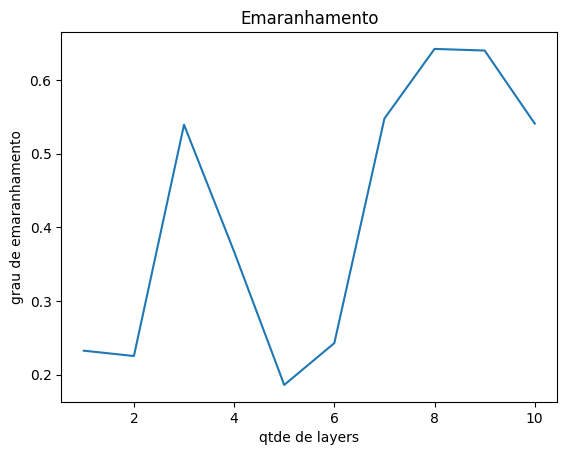

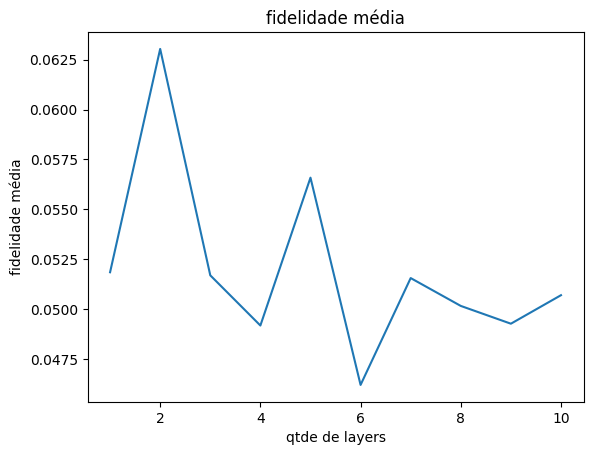

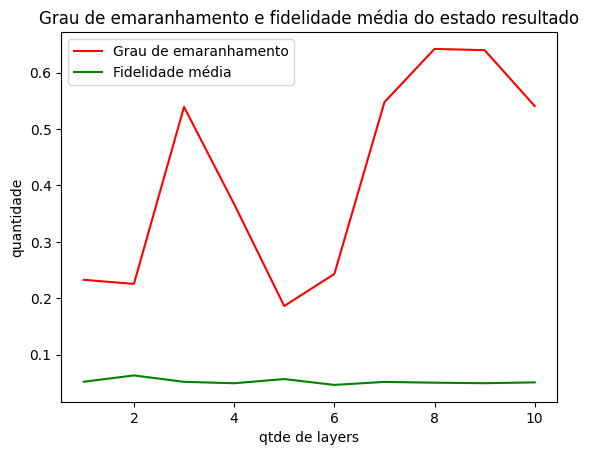

In [4]:
import numpy as np
import qutip
import pennylane as qml
import pandas as pd
import matplotlib.pyplot as plt

#Inputs


def cria_param(b):
    x=[]
    for i in range(1,b+1):
        x.append(i)
    return x

layers = cria_param(10)
wires = [2,3,4,5,6,7,8]
targetss = [1,2,3,4,5,6,7,8,9,10]
iteracao = [1,2,3,4,5,6,7,8,9,10]

iter = len(layers)

def function(layers,wires,targetss,iteracao,iter):

    aux = []
    for i in range(iter):

        n_layers = layers[i]     #MUDAR AQUI
        n_wires = wires[2]
        n_targets = targetss[-1]
        iteracoes = iteracao[0]



        def StronglyEntanglingLayers(n_layers, n_wires, n_targets):

            #Cria dados
            def normaliza(v):
                v = v / (np.linalg.norm(v))    
                return v

            def cria_alvos(n_targets, n_wires):
                target_states = []
                for i in range(n_targets):
                    target_states.append(normaliza(np.random.rand(1, 2**(n_wires))))
                return target_states


            def cria_pesos(n_layers, n_wires):
                shape = qml.StronglyEntanglingLayers.shape(n_layers, n_wires)   #Formato do vetor de matrizes
                weights = np.random.random(size=shape)
                #print("\nVetor de matrizes peso: \n {}".format(weights))
                #print("\n")
                return weights


            #Cria circuitos
            @qml.qnode(dev)
            def circuit1(parameters):
                qml.StronglyEntanglingLayers(weights=parameters, wires=range(n_wires))
                return qml.state()


            def ket_in_amplt(v):
                aux = []
                for i in range(len(v)):
                    v[i] = np.dot(v[i],v[i])
                    v[i] = np.linalg.norm(v[i])
                    aux.append(float(v[i].real))
                aux = np.array(aux)    
                return aux


            #Instanciação
            weights = cria_pesos(n_layers, n_wires)
            #print(qml.draw(circuit1, expansion_strategy="device")(weights))
            ket = circuit1(weights)
            amplt = ket_in_amplt(ket)
            target_states = cria_alvos(n_targets, n_wires)



            #Expressabilidade
            def fidelity(target_states, amplt):
                fidelity_sum = 0
                for target_state in target_states:
                    output_probs = amplt
                    fidelity = np.vdot(target_state, output_probs) ** 2
                    fidelity_sum += fidelity
            
                average_fidelity = fidelity_sum / len(target_states)
                return average_fidelity



            #Grau de Emaranhamento
            def compute_Q_ptrace(ket, N):
                ket = qutip.Qobj(ket, dims=[[2]*(N), [1]*(N)]).unit()
                entanglement_sum = 0
                for k in range(N):
                    rho_k_sq = ket.ptrace([k])**2
                    entanglement_sum += rho_k_sq.tr()  
        
                Q = 2*(1 - (1/N)*entanglement_sum)
                return Q



            Q = compute_Q_ptrace(ket, n_wires)
            #print("\nGrau de Emaranhamento: {}".format(Q))

            E = fidelity(target_states, amplt)
            #print("Expressabilidade: {}".format(E))

            #print("\n\nEstado gerado: {}".format(ket))
            #print("\n\n\n\n\n")

            k=[Q,E]


            return k


        #qml.probs retorna a probabilidade de obter como resultado cada base computacional
        #Para 4 qubits este nos retornará 2^4 = 16 valores
        #Para transformar o objeto qml.probs() em qml.state() precisamos calcular a norma ao quadrado de cada componente do vetor

        dev = qml.device('default.qubit', wires=n_wires)

    
    
        #print("= Modelo: {} =".format(i+1))
        aux.append(StronglyEntanglingLayers(n_layers, n_wires, n_targets))
        #print(aux[i])
        #print("\n")
        
    return aux



k=function(layers,wires,targetss,iteracao,iter)

def pand(k):
    eman=[]
    exp=[]

    for i in range(iter):
        eman.append(k[i][0])
    for i in range(iter):
        exp.append(k[i][1]) 

    dic = {"Grau de Emaranhamento": eman, "Expressabilidade":exp}
    df = pd.DataFrame(dic)
    return df

pand(k)
print(pand(k).describe())

eman=[]
exp=[]

for i in range(iter):
    eman.append(k[i][0])
for i in range(iter):
    exp.append(k[i][1]) 


plt.plot(layers,eman)
plt.xlabel('qtde de layers')
plt.ylabel('grau de emaranhamento')
plt.title('Emaranhamento')
plt.show()

plt.plot(layers,exp)
plt.xlabel('qtde de layers')
plt.ylabel('fidelidade média')
plt.title('fidelidade média')
plt.show()

plt.plot(layers,eman,color='r',label='Grau de emaranhamento')
plt.plot(layers,exp,color='g',label='Fidelidade média')
plt.xlabel('qtde de layers')
plt.ylabel('quantidade')
plt.title('Grau de emaranhamento e fidelidade média do estado resultado')
plt.legend()
plt.show()



